In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
X_train = pd.read_csv('../data/train_set_X.csv')
y_train = pd.read_csv('../data/train_set_y.csv')

In [3]:
X_train.head()

,co2_emissions,sea_level,rainfall,population,renewable_energy_pct,extreme_weather_events,forest_area_pct
0,4.8,3.2,759,1358197397,31.8,9,41.1
1,19.0,1.4,1835,1146873886,34.0,9,36.1
2,6.5,3.8,740,914386174,8.6,9,26.1
3,9.4,1.4,882,589637290,26.1,6,34.9
4,14.0,3.4,1796,620506174,27.3,1,18.0


In [4]:
y_train.head()

,avg_temperature
0,32.4
1,23.9
2,16.6
3,33.3
4,11.5


In [7]:
print(X_train.columns)

Index(['co2_emissions', 'sea_level', 'rainfall', 'population',
       'renewable_energy_pct', 'extreme_weather_events', 'forest_area_pct'],
      dtype='object')


In [12]:
print(X_train.shape
      , y_train.shape)

(800, 7) (800, 1)


In [16]:
columns = ['co2_emissions', 'sea_level', 'rainfall', 'population',
       'renewable_energy_pct', 'extreme_weather_events', 'forest_area_pct']

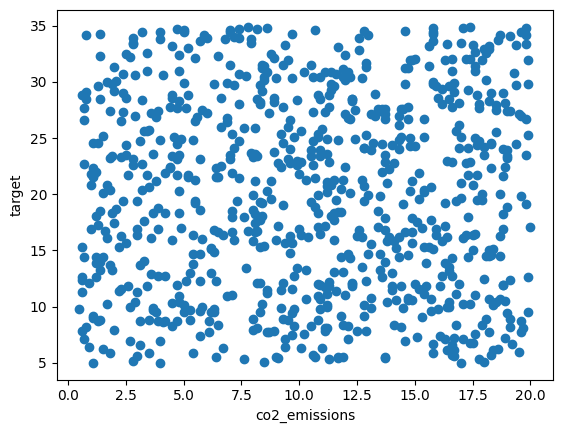

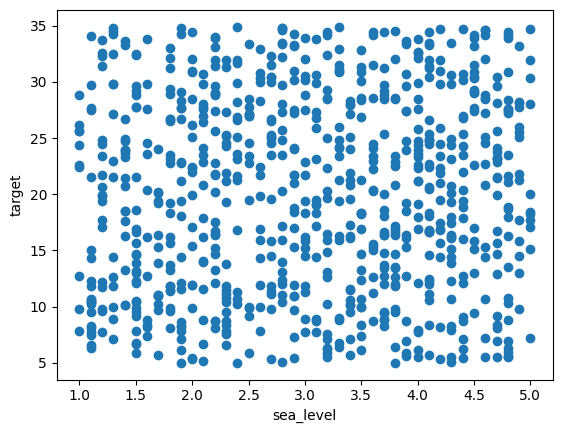

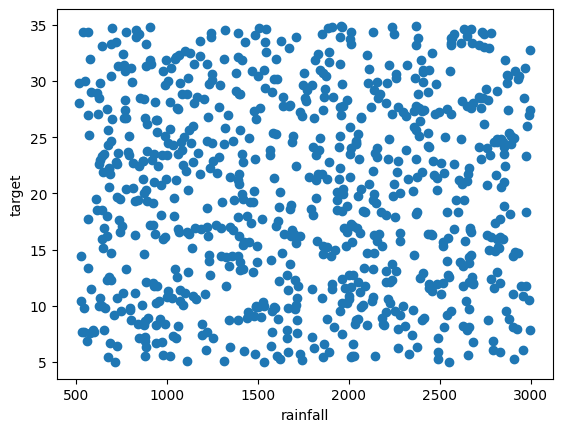

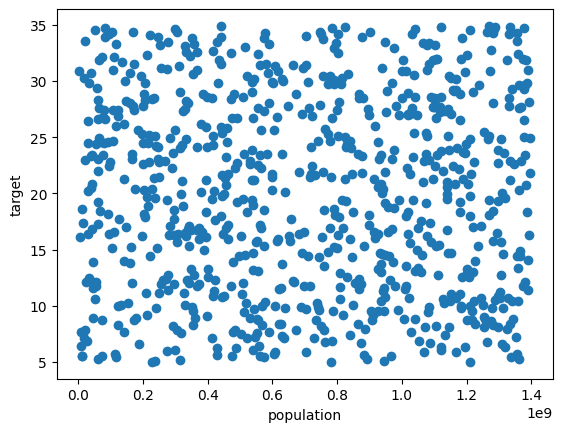

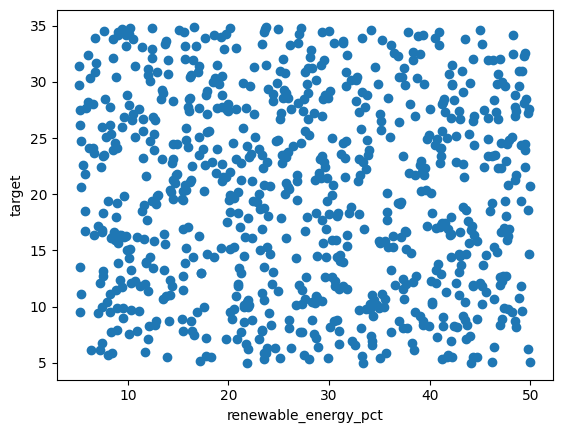

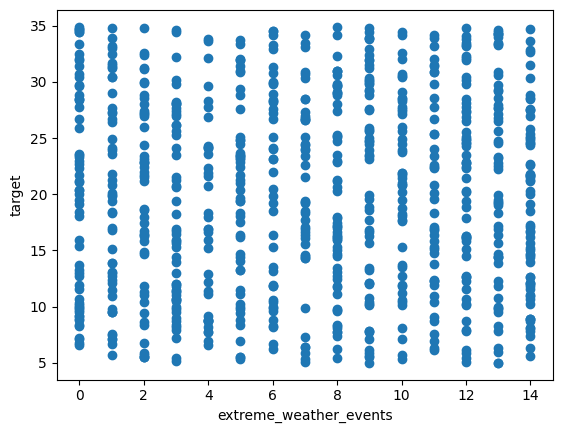

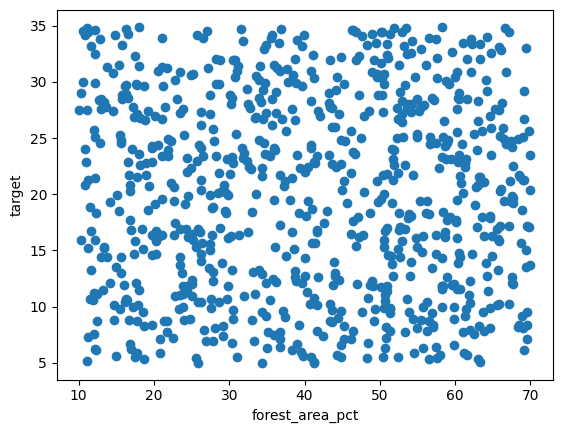

In [18]:
for i in columns:
    plt.scatter(X_train[i], y_train)
    plt.xlabel(i)
    plt.ylabel('target')
    plt.show()

In [26]:
# Imports for the SVR model, cross-validation, and evaluation metrics
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [22]:
# Make and fit initial model
svrpipeline = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 1.0))

In [24]:
# perform cross-validation
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(svrpipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
y_pred = best_model.predict(X_train)
print("r2 from training set: ", r2_score(y_train, y_pred))
print("mse on training set: ", mean_squared_error(y_train, best_model.predict(X_train)))

Best parameters found:  {'svr__C': 0.1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
r2 from training set:  0.0013958038889375635
mse on training set:  73.70078911231155


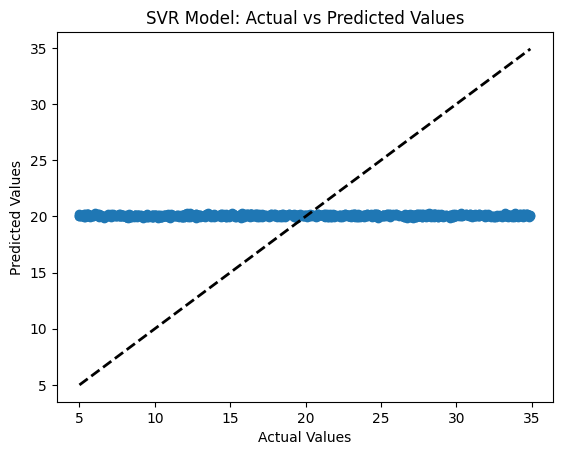

In [25]:
# plot predictions vs actual values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs Predicted Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

In [ ]:
# Checking if PCA would be beneficial
svrpipeline2 = make_pipeline(StandardScaler(), PCA(n_components=2), SVR(kernel = 'linear', C = 10.0))

Best parameters found with PCA:  {'svr__C': 0.1, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
r2 from training set with PCA:  0.009751525188675503
mse on training set with PCA:  73.08410508896029


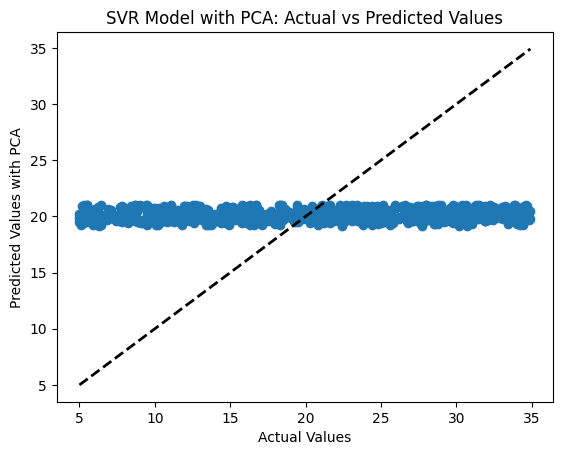

In [29]:
grid_search2 = GridSearchCV(svrpipeline2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X_train, y_train.values.ravel())
best_model2 = grid_search2.best_estimator_
print("Best parameters found with PCA: ", grid_search2.best_params_)
y_pred2 = best_model2.predict(X_train)
print("r2 from training set with PCA: ", r2_score(y_train, y_pred2))
print("mse on training set with PCA: ", mean_squared_error(y_train, best_model2.predict(X_train)))

plt.scatter(y_train, y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values with PCA')
plt.title('SVR Model with PCA: Actual vs Predicted Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

The SVR was not helpful in predicting temperature based on the given features. The coefficient of determination (R²) indicated little to no correlation between the input features and the target variable. Applying PCA decreased the mean squared error slightly from the original, but 